# Week 4


Assumption:- No friendships break, only new friendships are added as time passes.


In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt
import time

In [ ]:
def create_graph(n,f):
  #creates a graph with n "person" nodes and "focii" nodes from list F
  #with every "person" assigned a "bmi" and every "focii" assigned a "name"
  #and initially every person is connected to a focus node uar
  g=nx.Graph()
  g.add_nodes_from(range(1,n+1))
  g=assign_bmi(g)
  g=add_focii_nodes(g,n,f)
  g=add_focii_edges(g,n,f)
  return g

def assign_bmi(g):
  #assigns random bmi to each node and defines type of each node as "person"
  for i in g.nodes():   #assigning attributes "name"(i.e. bmi) and "type" to each node 
    g.nodes()[i]["name"]=round(r.uniform(15,40),2)
    g.nodes()[i]["type"]="person"
  return g

def add_focii_nodes(g,n,f):
  #adding focii nodes with labels from list f
  j=0
  for i in range(n+1,n+1+len(f)):   #assigning attributes "name"(i.e. focus name) and "type"(i.e focus) to each node 
    g.add_node(i)
    g.nodes()[i]["name"]=f[j]
    g.nodes()[i]["type"]="focus"
    j+=1
  return g

def add_focii_edges(g,n,f):
  #initially every "person" node is connected to a focus node at random
  for i in g.nodes():
    if g.nodes()[i]["type"]=="person":
      s=list(range(n+1,n+1+len(f)))
      rf=r.choice(s)
      g.add_edge(i,rf)
  return g

F=["gym","eatout","mall","club","park"]
G=create_graph(100,F)



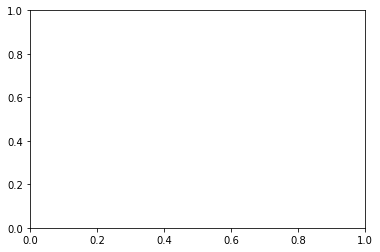

In [ ]:
def visualize(g,t):
  #shows the graph g with labels (indicating "name" bmi or focus name),
  #node size (indicating relative bmi), node color(indicating focii, under wt.,normal-over wt. and obese)
  time.sleep(1)
  nx.draw(g,labels=get_labels(g),node_size=get_nsize(g),node_color=get_color(g))
  plt.savefig("evolution.jpg")
  plt.clf()
  plt.cla()
  nx.write_gml(g,"evolution"+str(t)+".gml")

def get_labels(g):
  #return a dictionary with (key,values) pair as (node,bmi of the node)
  d={}
  for i in g.nodes():
    d[i]=g.nodes()[i]["name"]
  return d

def get_nsize(g):
  #gives a list of sizes for all nodes
  #for "person" node size=25*bmi_of_node
  #for "focus" node size=1500 
  l=[]
  for i in g.nodes():
    if g.nodes()[i]["type"]=="person":
      l.append(g.nodes()[i]["name"]*25)
    else:  l.append(1500)
  return l

def get_color(g):
  #gives colours for each node of graph
  #red : focii, blue: obese, 
  #green: normal to over weight, yellow: under weight
  c=[]
  for i in g.nodes():
    if g.nodes()[i]["type"]=="focus": c.append("red")
    else: 
      if g.nodes()[i]["name"]<=18.5: c.append("yellow")  #under weight
      elif  g.nodes()[i]["name"]<=29.9: c.append("green") #normal to over weight
      else: c.append("blue") #obese
  return c

visualize(G,0)

**Homophily**

P(edge b/w X and Y nodes) is proportional to $$\frac{1}{\left|bmi\left(X\right)-bmi\left(Y\right)\right|+1000}$$


---


"+1000" ensures that the fraction never becomes infinity(if bmi(X)==bmi(Y)) and it also reduces the P (which further prevents sudden "edge addition" rush).
If we increase 1000 to 5000 the probability of having an edge between X and Y decreases even further.


---

In lecture, homophily was quantified differently(i.e. $$1-\frac{actual \,number \,of \,edges \,between \,2 \,groups}{expected \,number \,of \,edges \,between \,the \,2 \,groups}$$), but this quantification captures the idea of homophily equally well


In [ ]:
def homophily(g):
  for i in g.nodes():
    if g.nodes()[i]["type"]=="person":
      for j in g.nodes():
        if g.nodes()[j]["type"]=="person" and i!=j:
          diff=abs(g.nodes()[i]["name"]-g.nodes()[j]["name"])
          prob=1/(diff+1000)
          x=r.uniform(0,1)
          if x<prob: 
            g.add_edge(i,j)

**Closures** 
1. triadic
2. focus
3. membership

In [ ]:
def closure(g):
  l=[]
  for i in g.nodes():
    for j in g.nodes():
        if (g.nodes()[j]["type"]=="person" or g.nodes()[i]["type"]=="person") and i!=j:
          k=cmn(i,j,g)
          prob=1-((1-0.1)**k)
          t=[i,j,prob]
          l.append(t)
  
  for i in l:
    x=r.uniform(0,1)
    if x<i[-1]: 
      g.add_edge(i[0],i[1])

def cmn(i,j,g):
  li,lj=set(g.neighbors(i)),set(g.neighbors(j))
  return len(li &lj)


**Social influence**

In [ ]:
def social_influence(g):
  for i in g.nodes():
    if g.nodes()[i]["name"]=="eatout":
        for j in g.neighbors(i):
          if g.nodes()[j]["name"]<39: g.nodes()[j]["name"]+=1
    if g.nodes()[i]["name"]=="gym":
        for j in g.neighbors(i):
          if g.nodes()[j]["name"]>15: g.nodes()[j]["name"]-=1



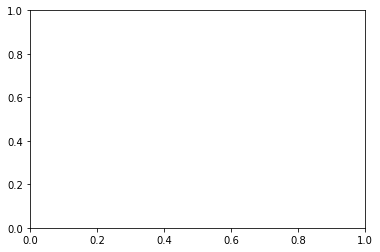

In [ ]:
for i in range(10):
  homophily(G)
  closure(G)
  social_influence(G)
  visualize(G,i+1)

How the number of obese people and density change during the course of 10 units of time?


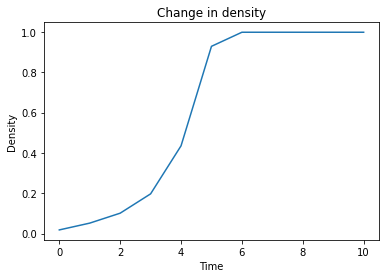

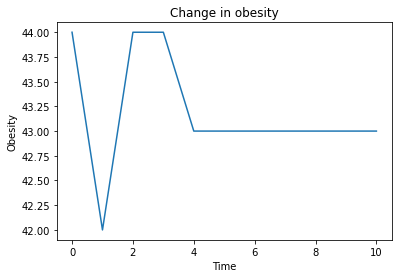

In [ ]:
def density(g):
  x,y=[],[]
  for i in range(11):
    g=nx.read_gml("evolution"+str(i)+".gml")
    x+=[i]
    y+=[nx.density(g)]
  plt.xlabel("Time")
  plt.ylabel("Density")
  plt.title("Change in density")
  plt.plot(x,y)
  plt.show()

density(G)

def obesity(g):
  x,y=[],[]
  for i in range(11):
    g=nx.read_gml("evolution"+str(i)+".gml")
    x+=[i]
    y+=[number_of_obese(g)]
  plt.xlabel("Time")
  plt.ylabel("Obesity")
  plt.title("Change in obesity")
  plt.plot(x,y)
  plt.show()

def number_of_obese(g):
  t=0
  for i in g.nodes():
    if g.nodes()[i]["type"]=="person" and g.nodes()[i]["name"]>29.9: t+=1
  return t

obesity(G)

find number of membership clousures, number of triads,focal clousures